In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')
import visuals as vp
import properties_1 as ps
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Dense(300, activation = 'relu', input_shape=(30,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [2]:
df = pd.read_csv('data.csv')
df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1,47.92
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,...,403.5,600.4,386.0,716.9,1347.0,1479.0,1261.0,858.1,1265.0,181.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0.0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0.0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
sum(df.duplicated())

0

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
p = df.describe().T
p = p.round(4)
table = go.Table(
    columnwidth=[0.8]+[0.5]*8,
    header=dict(
        values=['Attribute'] + list(p.columns),
        line = dict(color='#506784'),
        fill = dict(color='lightblue'),
    ),
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]],
        line = dict(color='#506784'),
        fill = dict(color=['rgb(173, 216, 220)', '#f5f5fa'])
    )
)
py.iplot([table], filename='table-of-mining-data')

B    357
M    212
Name: diagnosis, dtype: int64


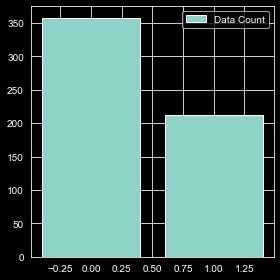

In [8]:
B, M = df['diagnosis'].value_counts()
s = [B,M]
print(df['diagnosis'].value_counts())
with plt.style.context('dark_background'):
    plt.figure(figsize=(4, 4))

    plt.bar([0,1], s,align='center',
            label='Data Count')
    plt.ylabel('')
    plt.xlabel('')
    plt.legend(loc='best')
    plt.tight_layout()

In [9]:
B, M = df['diagnosis'].value_counts()
trace1 = go.Bar(y = (M, B), x = ['malignant', 'benign'],opacity = 0.8)


trace2 = go.Pie(labels = ['Benign','Malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8)


py.iplot([trace2])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

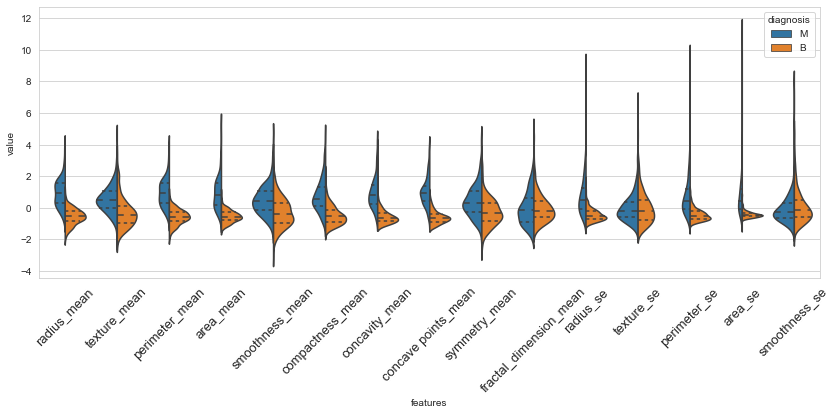

In [10]:
data_dia = df['diagnosis']
data = df.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([df['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13)

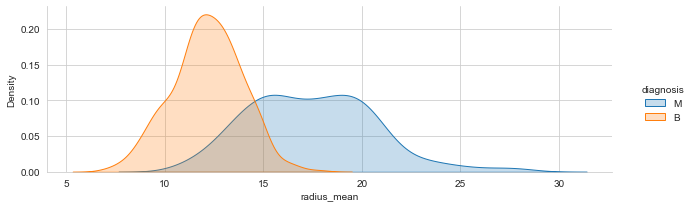

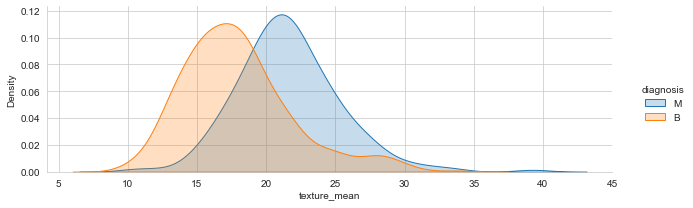

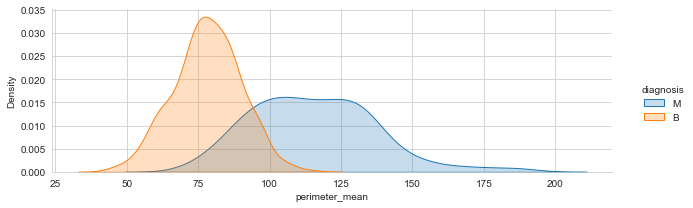

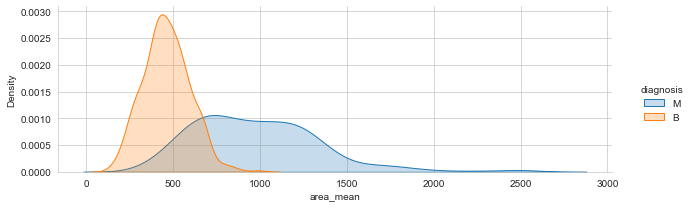

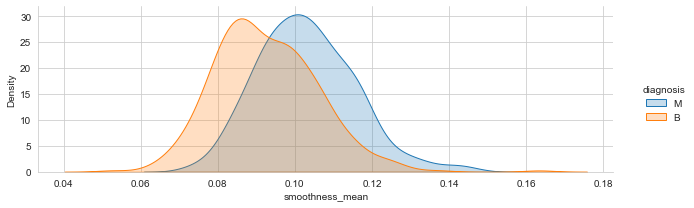

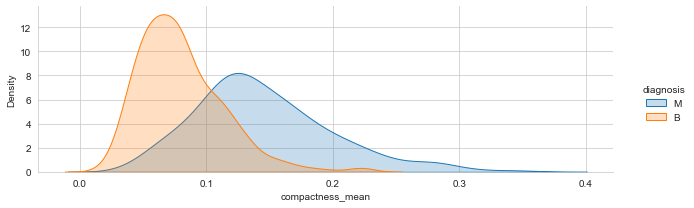

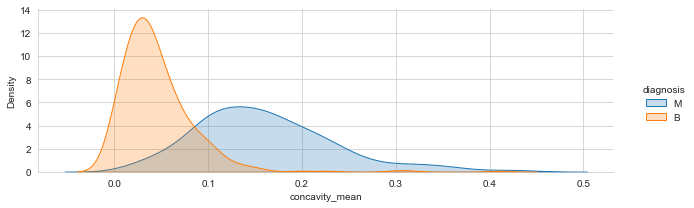

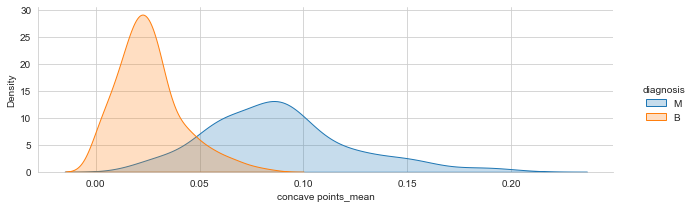

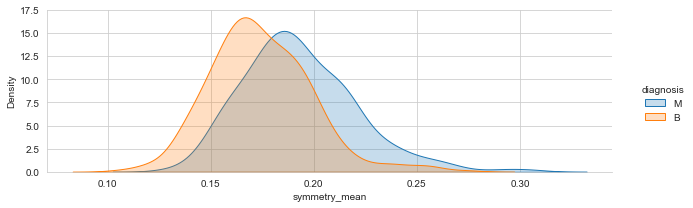

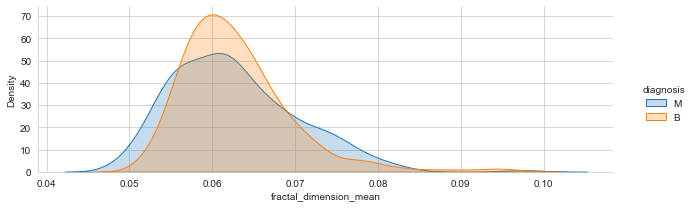

In [11]:
mean_col = [col for col in df.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()
    #ax.set_title('lalala')

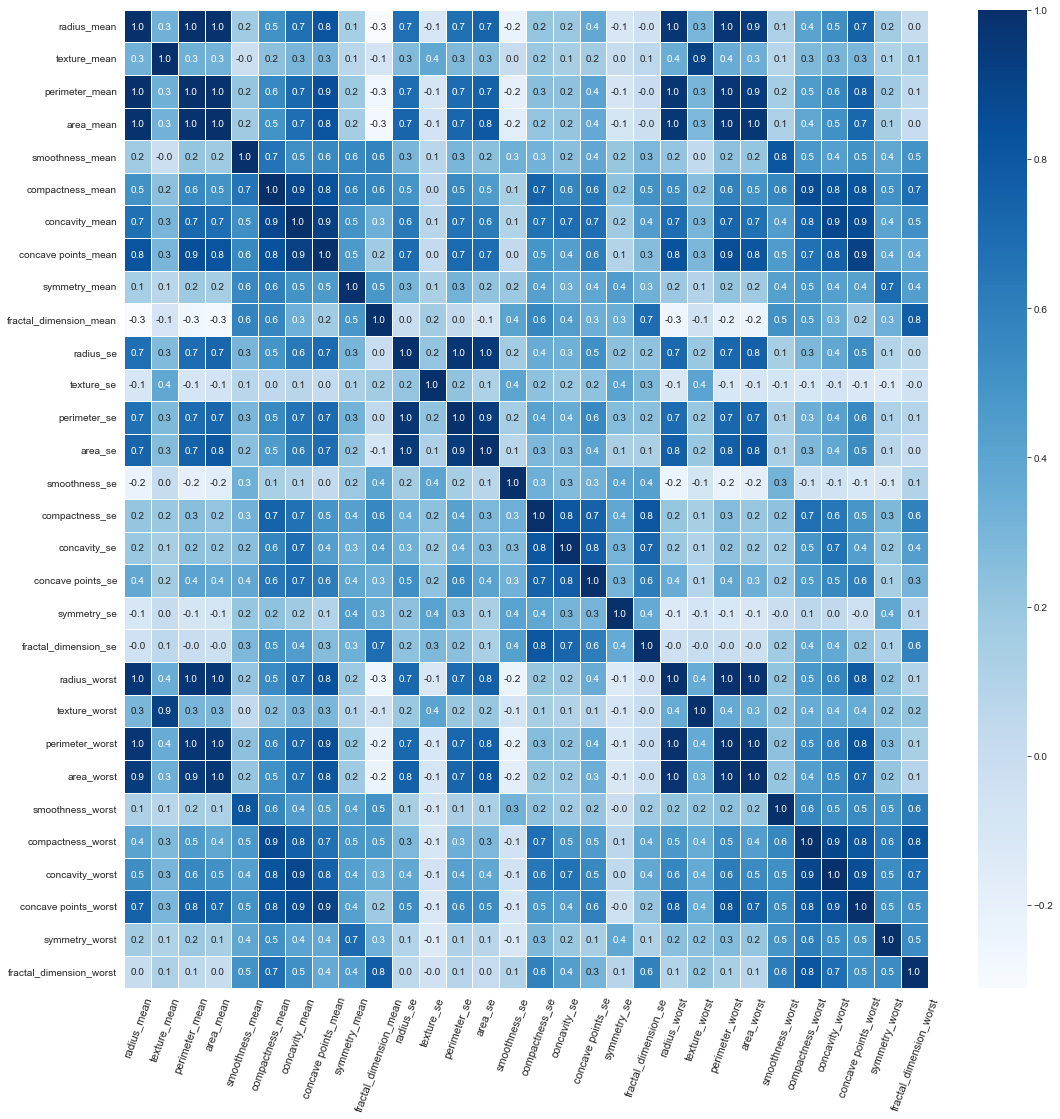

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

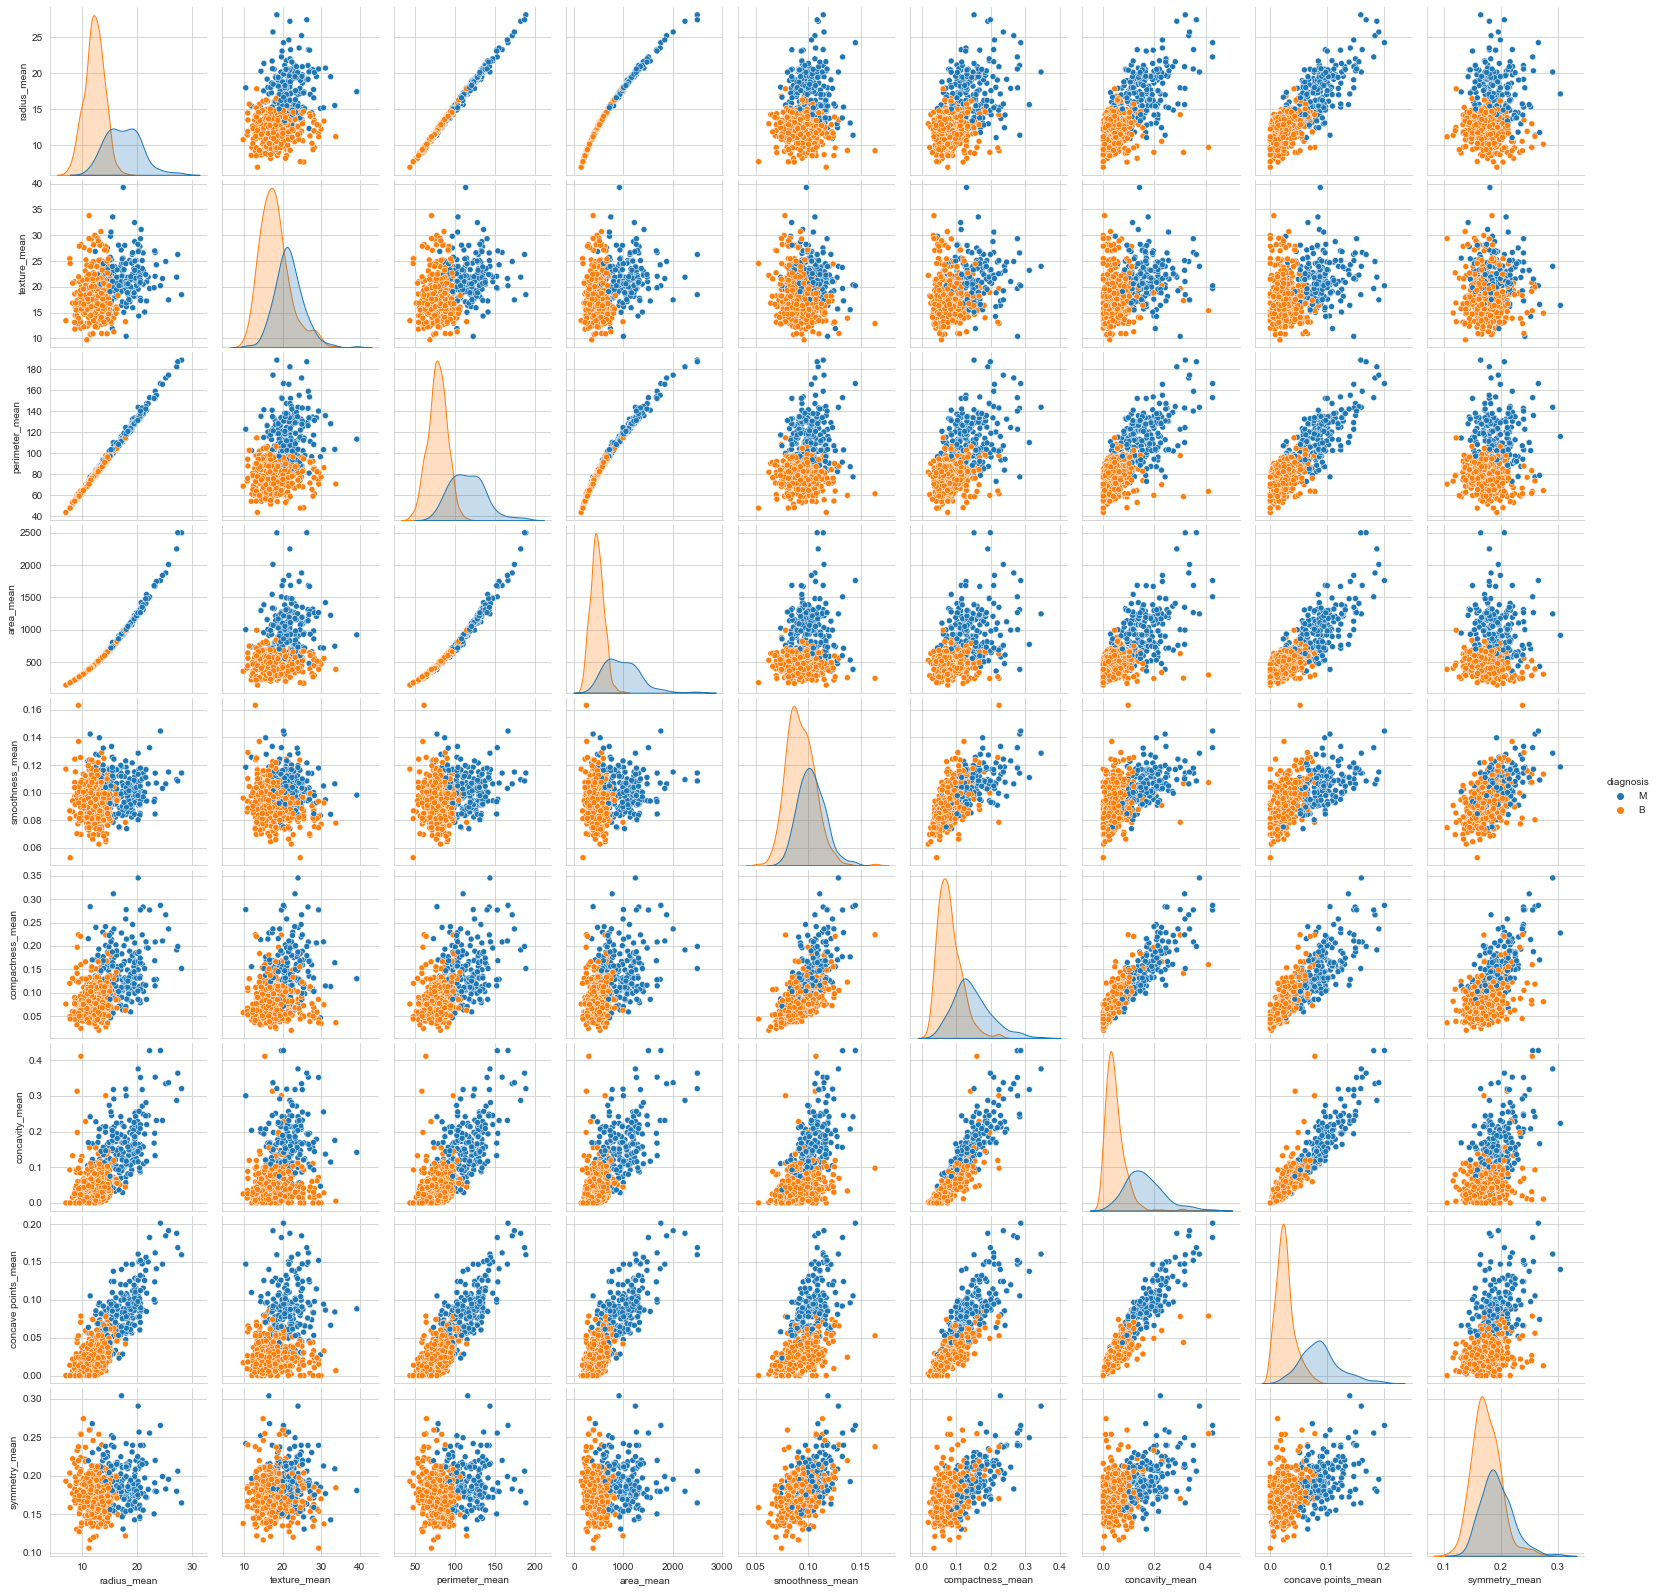

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']
sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')

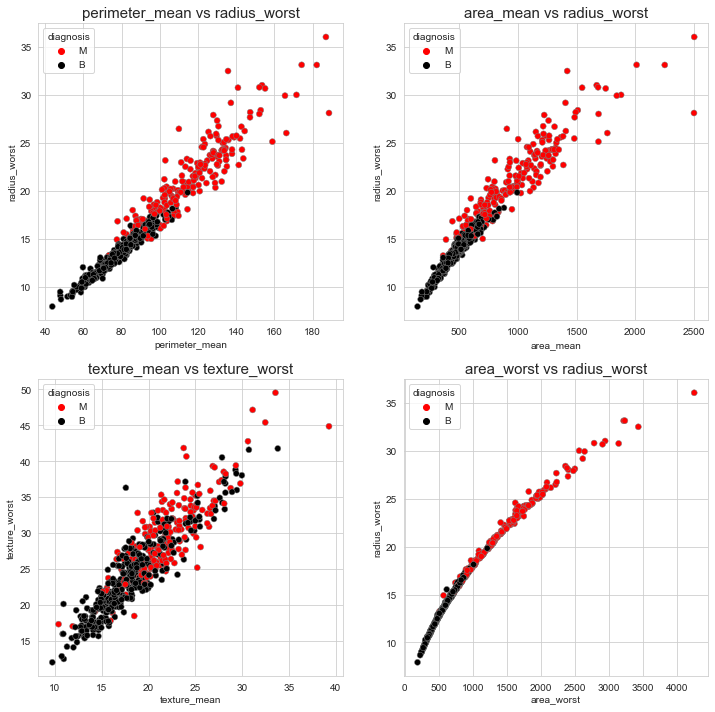

In [14]:
palette ={'B' : 'black', 'M' : 'red'}
edgecolor = 'grey'

fig = plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.color_palette("bright")
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b,fontsize=15)
    k+=1

    
plot_scatter('perimeter_mean','radius_worst',221)   
plot_scatter('area_mean','radius_worst',222)   
plot_scatter('texture_mean','texture_worst',223)   
plot_scatter('area_worst','radius_worst',224)   

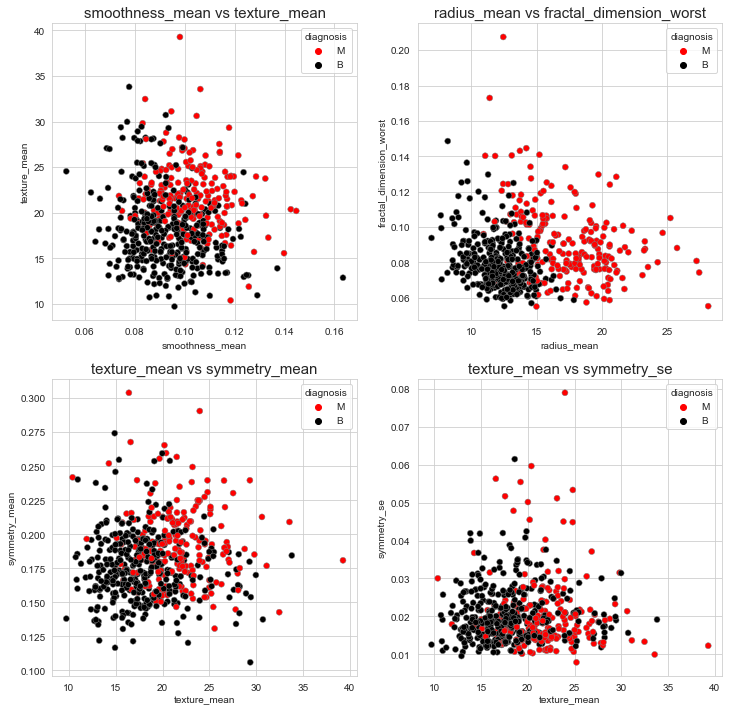

In [15]:
fig = plt.figure(figsize=(12,12))
plot_scatter('smoothness_mean','texture_mean',221)
plot_scatter('radius_mean','fractal_dimension_worst',222)
plot_scatter('texture_mean','symmetry_mean',223)
plot_scatter('texture_mean','symmetry_se',224)

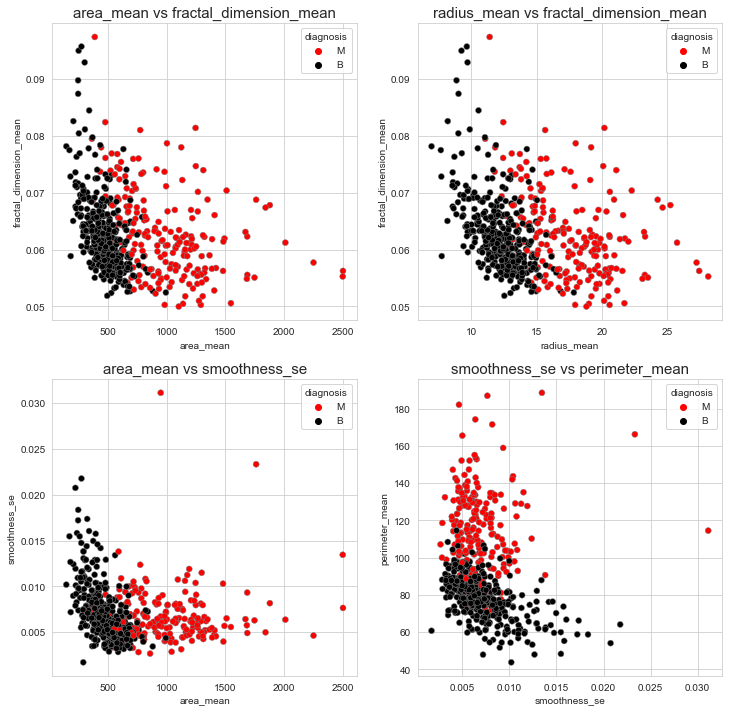

In [16]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

In [17]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [18]:
df.loc[Outliers_to_drop]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.10,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,B,13.24,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.1357,0.2845,0.12490
485,B,12.45,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,...,13.78,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.1342,0.3231,0.10340
242,B,11.30,18.19,73.93,389.4,0.09592,0.1325,0.1548,0.02854,0.2054,...,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [19]:
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [20]:
df.shape

(486, 31)

In [21]:
group_map = {"M": 1, "B": 0}

df['diagnosis'] = df['diagnosis'].map(group_map)

In [22]:
target_pca = pd.DataFrame(df['diagnosis'])
data_pca = df.drop('diagnosis', axis=1)

X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')

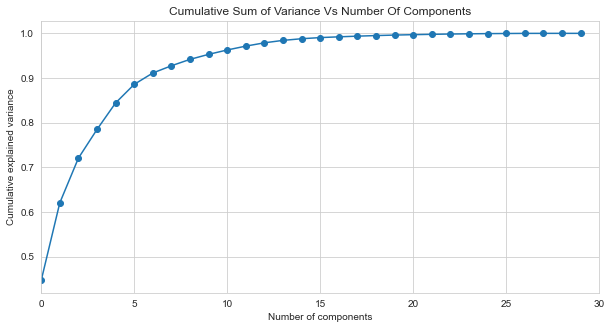

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

In [24]:
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
labels = []
for i in range(1,31):
    labels.append('Col_'+str(i))
trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15))
layout = dict(title =  'PCA : components and explained variance')
fig = dict(data = [trace], layout=layout)

In [25]:
pca.explained_variance_ratio_

array([4.46380247e-01, 1.73921362e-01, 1.00118724e-01, 6.42590674e-02,
       5.94288560e-02, 4.15840738e-02, 2.54594333e-02, 1.62203187e-02,
       1.43275858e-02, 1.12520663e-02, 9.80155599e-03, 8.63553161e-03,
       7.40950929e-03, 5.45161332e-03, 3.70277887e-03, 2.54032992e-03,
       1.71613424e-03, 1.51916114e-03, 1.30269213e-03, 1.11344975e-03,
       9.03492816e-04, 7.68698470e-04, 6.88546885e-04, 4.77091393e-04,
       4.07666896e-04, 2.85008652e-04, 2.48131245e-04, 5.26691004e-05,
       2.05729397e-05, 3.63227443e-06])

In [26]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#X = pd.DataFrame(preprocessing.scale(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign','Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, _ = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

In [28]:
from keras.layers import Input, Dense, Activation, Dropout, Flatten,BatchNormalization, Conv2D, MaxPooling2D

In [29]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [30]:
model.summary()
keras.utils.plot_model(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               9300      
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 39,501
Trainable params: 39,501
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [31]:
num_classes = 2
inputs = Input(shape=(50, 50, 3))

In [32]:
from keras.layers import Input,Conv2D,Activation,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout,add

In [33]:

conv1 = Conv2D(32, (3, 3), activation='relu',padding='same')(inputs)
conv2 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv1)

maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool2)
conv4 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv3)


skip1 = add([maxpool2, conv4])

conv5 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip1)
conv6 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv5)

maxpool6 = MaxPooling2D(pool_size=(2, 2))(conv6)

conv7 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool6)
conv8 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv7)


skip2 = add([maxpool6, conv8])

conv9 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip2)
conv10 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv9)

maxpool9 = MaxPooling2D(pool_size=(2, 2))(conv10)

conv11 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool9)
conv12 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv11)

skip3 = add([maxpool9, conv12])

conv13 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip3)
conv14 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv13)

maxpool10 = MaxPooling2D(pool_size=(2, 2))(conv14)

conv15 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool10)
conv16 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv15)

skip4 = add([maxpool10, conv16])

conv17 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip4)
conv18 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv17)

maxpool11 = MaxPooling2D(pool_size=(2, 2))(conv18)

conv19 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool11)
conv20 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv19)

skip5 = add([maxpool11, conv20])


flat = Flatten()(skip5)
dense9=Dense(16,activation='relu')(flat)
predictions=Dense(2,activation='softmax')(dense9)

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=35, validation_split=0.1, callbacks= [early_stopping_cb])

Epoch 1/35
10/10 [==============================] - 1s 25ms/step - loss: 0.6176 - accuracy: 0.7190 - val_loss: 0.5357 - val_accuracy: 0.8235
Epoch 2/35
10/10 [==============================] - 0s 6ms/step - loss: 0.5058 - accuracy: 0.8758 - val_loss: 0.4619 - val_accuracy: 0.9412
Epoch 3/35
10/10 [==============================] - 0s 6ms/step - loss: 0.4314 - accuracy: 0.9052 - val_loss: 0.4096 - val_accuracy: 0.9412
Epoch 4/35
10/10 [==============================] - 0s 6ms/step - loss: 0.3777 - accuracy: 0.9412 - val_loss: 0.3702 - val_accuracy: 0.9706
Epoch 5/35
10/10 [==============================] - 0s 6ms/step - loss: 0.3377 - accuracy: 0.9510 - val_loss: 0.3389 - val_accuracy: 0.9706
Epoch 6/35
10/10 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.9510 - val_loss: 0.3132 - val_accuracy: 0.9706
Epoch 7/35
10/10 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.9510 - val_loss: 0.2923 - val_accuracy: 0.9706
Epoch 8/35
10/10 [=

On linear kernel:


Confusion Matrix:
[[94  1]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.94      0.96        51

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



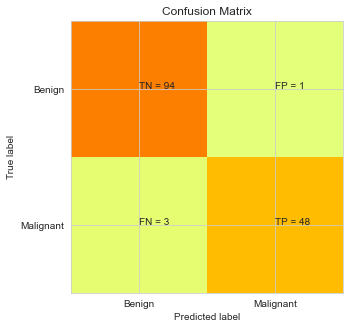

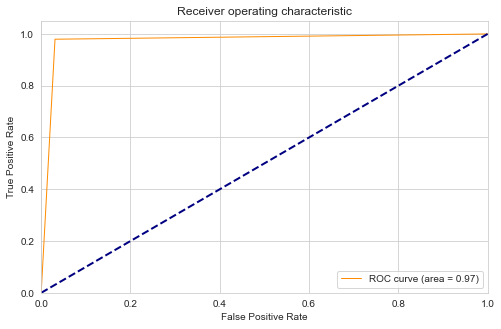


Acuuracy Of the Model:  0.9726027397260274 


On rbf kernel:


Confusion Matrix:
[[95  0]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.94      0.97        51

    accuracy                           0.98       146
   macro avg       0.98      0.97      0.98       146
weighted avg       0.98      0.98      0.98       146



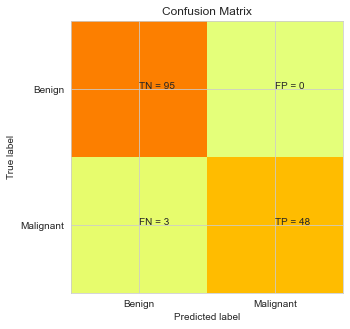

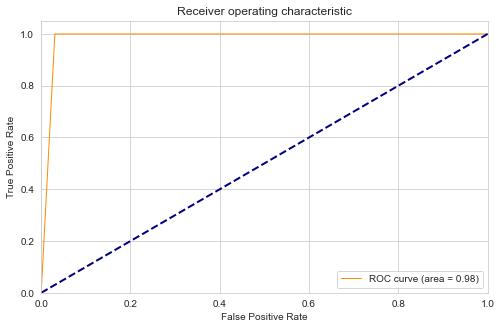


Acuuracy Of the Model:  0.9794520547945206 




In [35]:
for i in ['linear','rbf']:
    clf = SVC(kernel=i)
    clf.fit(X_train,y_train)
    print("On "+ i + " kernel:" )
    report_performance(clf)
    roc_curves(clf)
    accuracy(clf)

In [39]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [44]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
data_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [45]:
df = data_model.get_weights()[0]
df = data_model.get_weights()[1]
df = data_model.get_weights()[2]
df = data_model.get_weights()[3]
df = data_model.get_weights()[4]

In [46]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
sunspots = 'result.csv'
train_data, test_data, data = get_train_test(sunspots)

In [47]:

def get_XY(dat, time_steps):
  
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [52]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])

In [66]:

def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
def print_error(trainY, testY, train_predict, test_predict):    
 
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    
 
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Number of records')
    plt.ylabel(' Predictions')
    plt.title('RNN Result')
 
time_steps = 12

trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
 
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
 
print_error(trainY, testY, train_predict, test_predict)
 

Epoch 1/20
187/187 - 1s - loss: 0.0695 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0393 - 422ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0323 - 417ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0280 - 417ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0248 - 433ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0221 - 417ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0200 - 434ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0185 - 432ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0171 - 418ms/epoch - 2ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0159 - 521ms/epoch - 3ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0152 - 455ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0143 - 426ms/epoch - 2ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0134 - 507ms/epoch - 3ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0129 - 490ms/epoch - 3ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0125 - 437ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.01

In [67]:
df = pd.read_csv('result.csv')

In [68]:
df.T.head(3)

,0,1
Methods,CNN,RNN
Accuracy,98,90


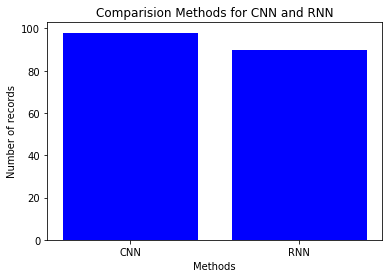

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
data = pd.read_csv('result.csv')
  
df = pd.DataFrame(data)
  
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
plt.bar(X, Y, color='blue')
plt.title("Comparision Methods for CNN and RNN")
plt.xlabel("Methods")
plt.ylabel("Number of records")
plt.show()